Total conversations: 513
Unique topics: 22

Top 10 topics by frequency:
conversational commerce: 57
ongoing promotionsn: 40
product not listed: 38
product information: 38
payment: 33
still thinking / not sure yet: 32
follow-up after quote: 29
refund: 28
cancellation: 27
login issues: 26


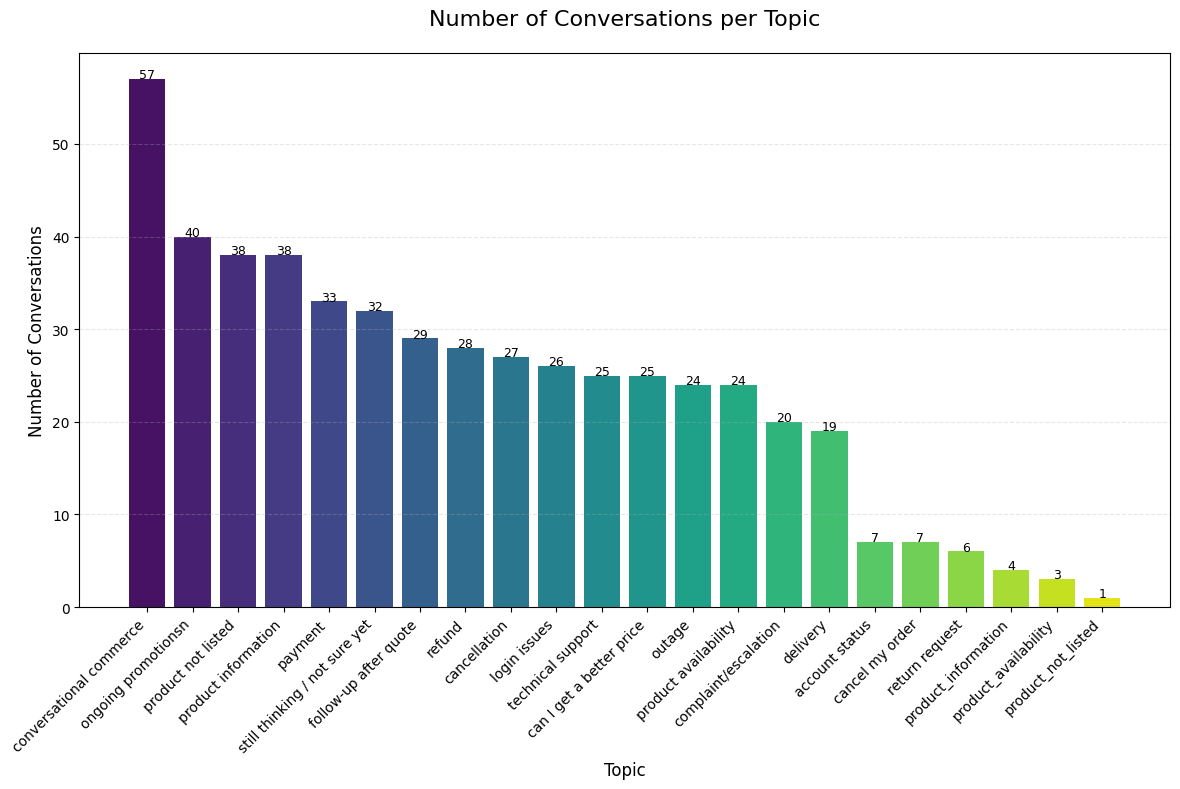

Visualization saved to topic_distribution.png


In [4]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
from pathlib import Path

file_path = "gulf_chats_merged.json"
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

topics = [chat["chat_id"].rsplit("_", 1)[0].strip() for chat in data]
topic_counts = Counter(topics)

sorted_topics = dict(sorted(topic_counts.items(), key=lambda x: x[1], reverse=True))


print(f"Total conversations: {len(data)}")
print(f"Unique topics: {len(topic_counts)}")
print("\nTop 10 topics by frequency:")
for topic, count in list(sorted_topics.items())[:10]:
    print(f"{topic}: {count}")


plt.figure(figsize=(12, 8))
colors = sns.color_palette("viridis", len(sorted_topics))


bars = plt.bar(sorted_topics.keys(), sorted_topics.values(), color=colors)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("Number of Conversations per Topic", fontsize=16, pad=20)
plt.xlabel("Topic", fontsize=12)
plt.ylabel("Number of Conversations", fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{height:.0f}', ha='center', fontsize=9)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.3)

output_path = Path("topic_distribution.png")
plt.savefig(output_path, dpi=300, bbox_inches="tight")
plt.show()

print(f"Visualization saved to {output_path}")

payment: 33
delivery: 19
outage: 24
refund: 28
technical support: 25
conversational commerce: 57
cancellation: 27
login issues: 26
product not listed: 38
product availability: 24
product information: 38
follow-up after quote: 29
complaint/escalation: 20
product_information: 4
can I get a better price: 25
ongoing promotionsn: 40
still thinking / not sure yet: 32
account status: 7
return request: 6
cancel my order: 7
product_not_listed: 1
product_availability: 3


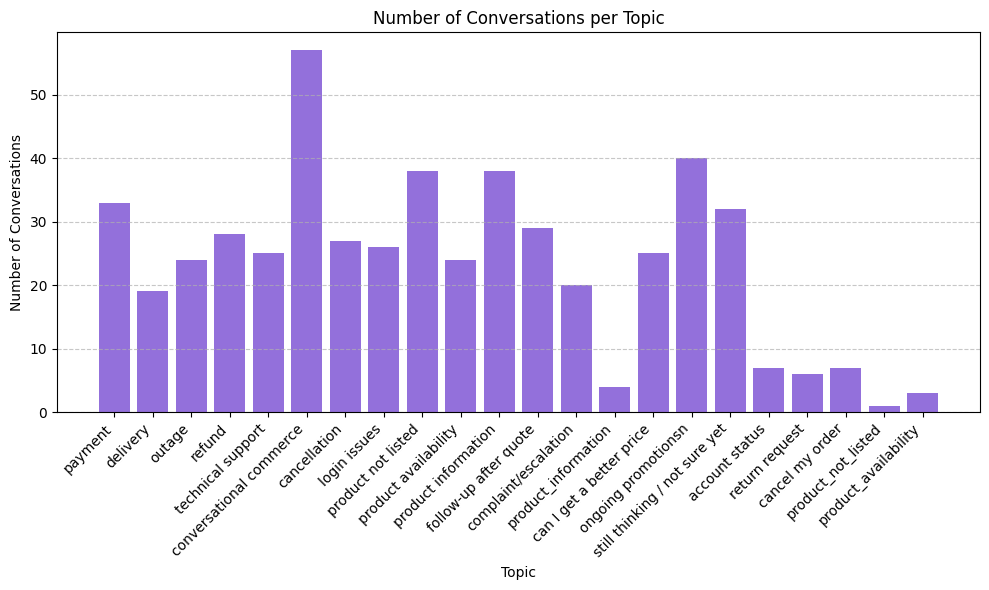

In [5]:
import json
import matplotlib.pyplot as plt
from collections import Counter

with open("gulf_chats_merged.json", "r") as f:
    data = json.load(f)

topics = [chat["chat_id"].rsplit("_", 1)[0].strip() for chat in data]

topic_counts = Counter(topics)

for topic, count in topic_counts.items():
    print(f"{topic}: {count}")

plt.figure(figsize=(10, 6))
plt.bar(topic_counts.keys(), topic_counts.values(), color="mediumpurple")
plt.xticks(rotation=45, ha="right")
plt.title("Number of Conversations per Topic")
plt.xlabel("Topic")
plt.ylabel("Number of Conversations")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


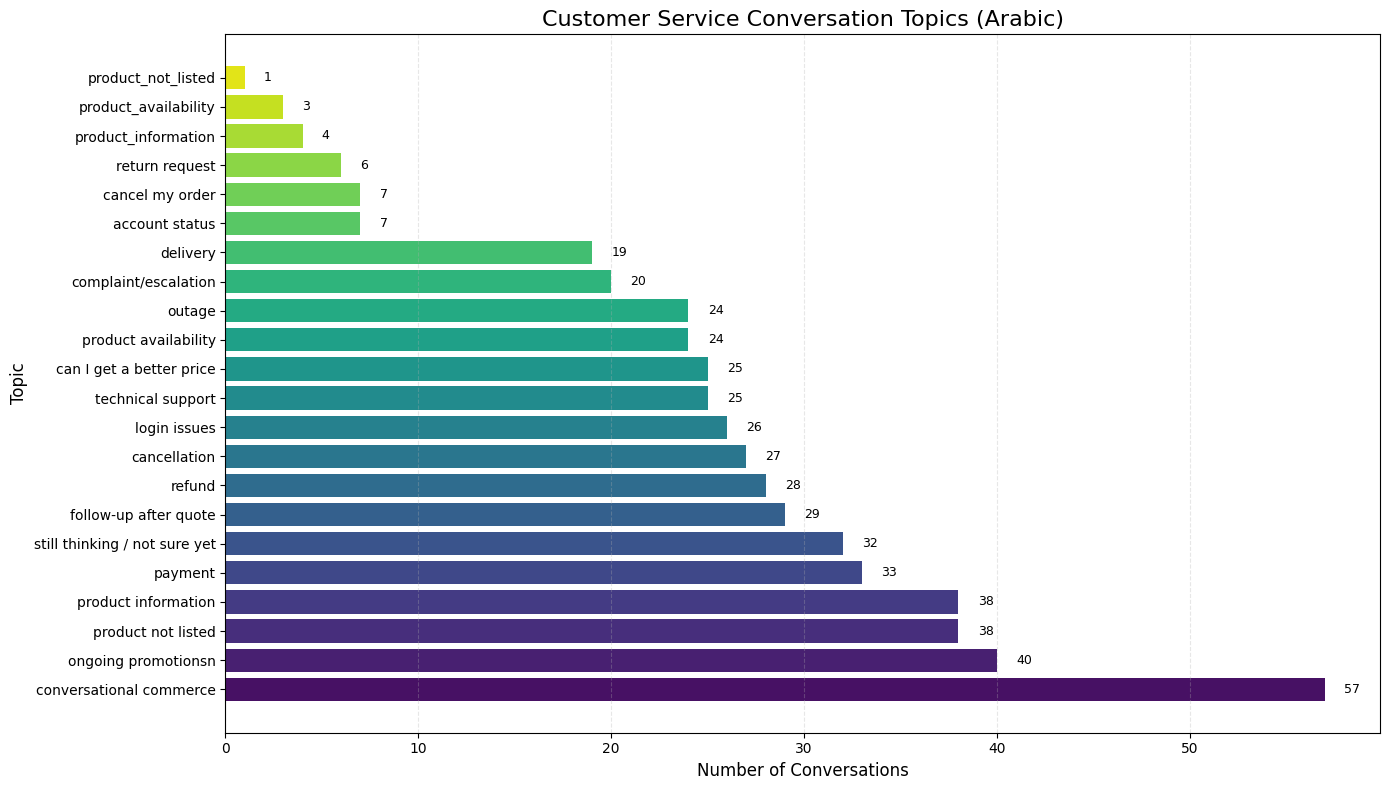

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data from your list
topics_data = {
    'payment': 33,
    'delivery': 19,
    'outage': 24,
    'refund': 28,
    'technical support': 25,
    'conversational commerce': 57,
    'cancellation': 27,
    'login issues': 26,
    'product not listed': 38,
    'product availability': 24,
    'product information': 38,
    'follow-up after quote': 29,
    'complaint/escalation': 20,
    'product_information': 4,
    'can I get a better price': 25,
    'ongoing promotionsn': 40,
    'still thinking / not sure yet': 32,
    'account status': 7,
    'return request': 6,
    'cancel my order': 7,
    'product_not_listed': 1,
    'product_availability': 3
}

df = pd.DataFrame(list(topics_data.items()), columns=['Topic', 'Count'])
df = df.sort_values('Count', ascending=False)

plt.figure(figsize=(14, 8))
colors = sns.color_palette("viridis", len(df))

bars = plt.barh(df['Topic'], df['Count'], color=colors)
plt.xlabel('Number of Conversations', fontsize=12)
plt.ylabel('Topic', fontsize=12)
plt.title('Customer Service Conversation Topics (Arabic)', fontsize=16)

for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 1
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width:.0f}', 
             va='center', fontsize=9)

plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.savefig('arabic_customer_service_topics.png', dpi=300, bbox_inches='tight')
plt.show()

/Users/mahmoud/.pyenv/versions/3.12.5/lib/python3.12/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/mahmoud/.pyenv/versions/3.12.5/lib/python3.12/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/mahmoud/.pyenv/versions/3.12.5/lib/python3.12/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


ModuleNotFoundError: No module named 'ace_tools'

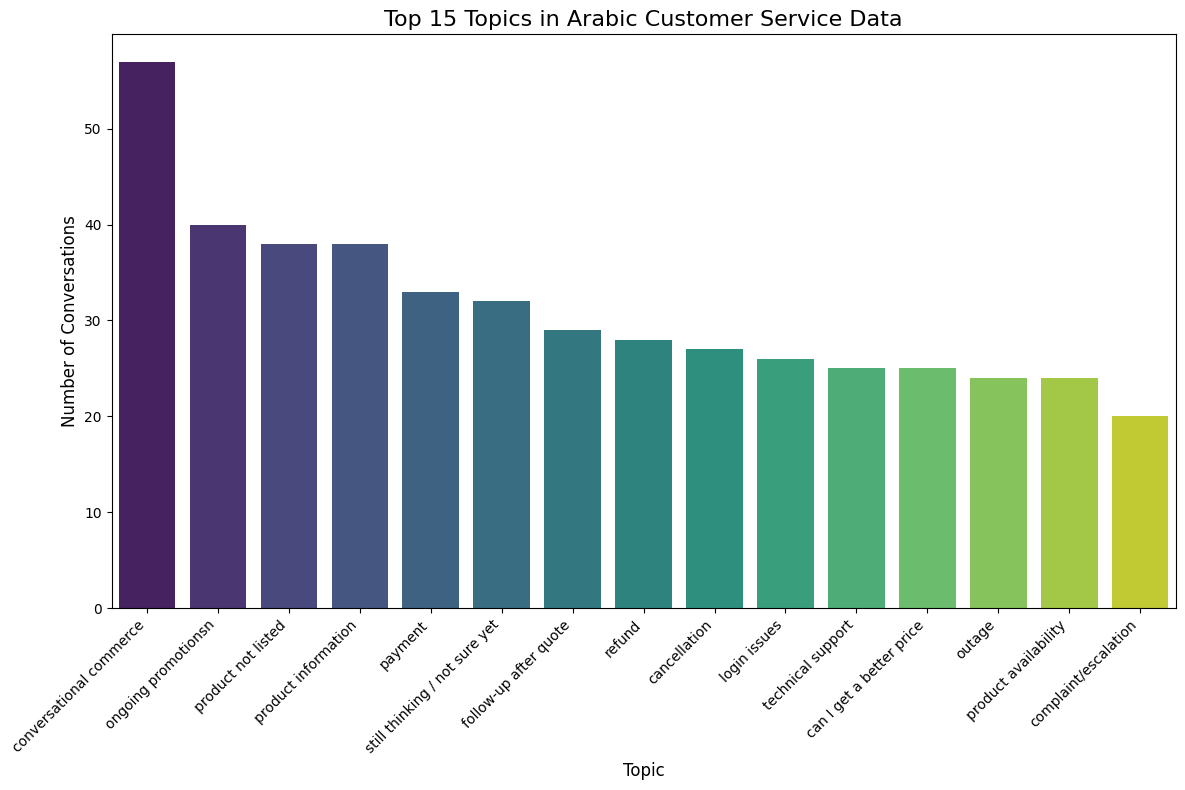

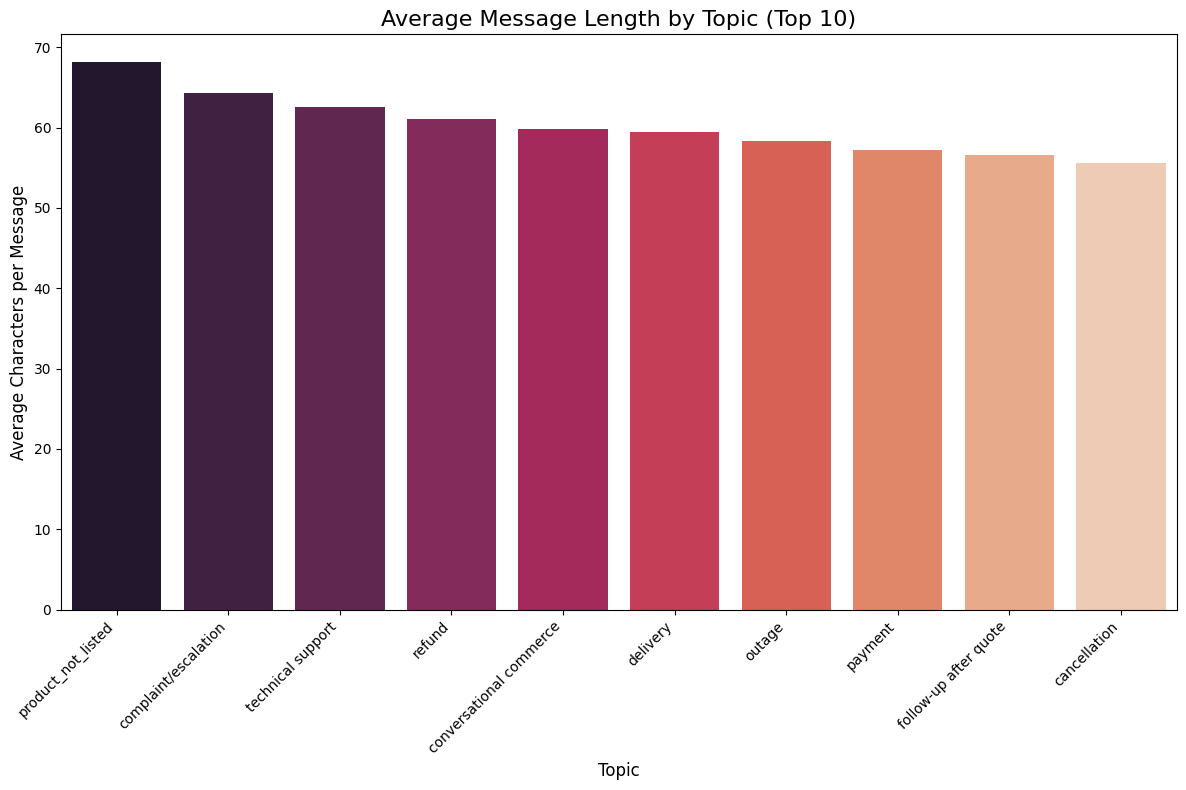

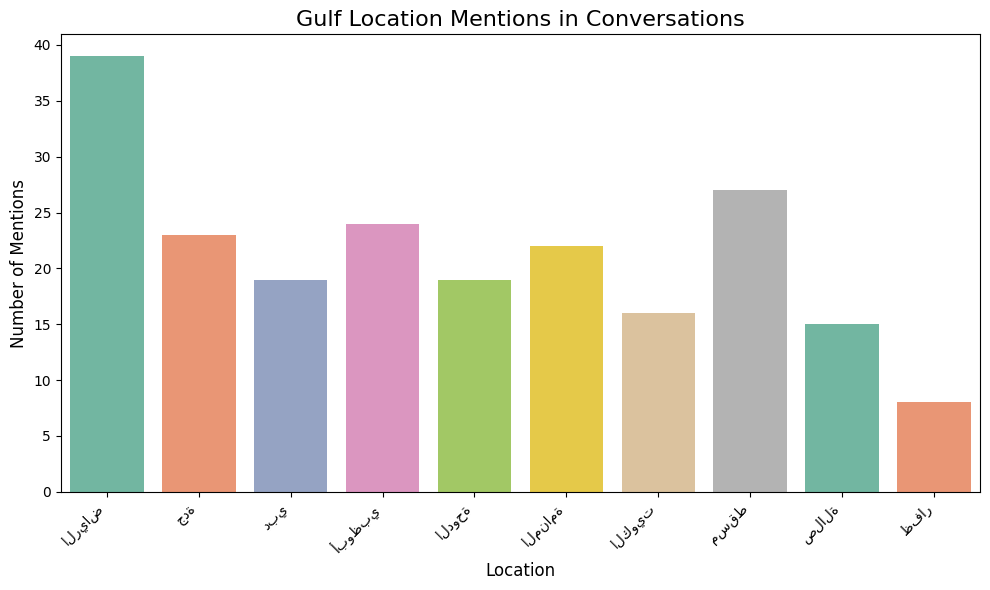

In [15]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from pathlib import Path


dataset_path = "gulf_chats_merged.json"
with open(dataset_path, "r", encoding="utf-8") as f:
    data = json.load(f)

total_conversations = len(data)
total_messages = sum(len(chat["messages"]) for chat in data)
all_messages = [msg for chat in data for msg in chat["messages"]]
avg_message_length_chars = sum(len(msg) for msg in all_messages) / len(all_messages)

# Extract topics and count occurrences
topics = [chat["chat_id"].rsplit("_", 1)[0].strip() for chat in data]
topic_counts = Counter(topics)

# Gulf locations analysis - enhanced with regex for better matching
gulf_locations = ["الرياض", "جدة", "دبي", "أبوظبي", "الدوحة", "المنامة", "الكويت", "مسقط", "صلالة", "ظفار"]
location_patterns = [re.compile(re.escape(loc), re.IGNORECASE) for loc in gulf_locations]
location_mentions = sum(any(pattern.search(msg) for pattern in location_patterns) for msg in all_messages)
location_counts = {loc: sum(loc.lower() in msg.lower() for msg in all_messages) for loc in gulf_locations}

# Message length analysis by topic
topic_message_lengths = {}
for chat in data:
    topic = chat["chat_id"].rsplit("_", 1)[0].strip()
    msg_lengths = [len(msg) for msg in chat["messages"]]
    if topic in topic_message_lengths:
        topic_message_lengths[topic].extend(msg_lengths)
    else:
        topic_message_lengths[topic] = msg_lengths

avg_length_by_topic = {topic: sum(lengths)/len(lengths) if lengths else 0 
                       for topic, lengths in topic_message_lengths.items()}

# Create summary DataFrame
summary_data = {
    "Total Conversations": [total_conversations],
    "Total Messages": [total_messages],
    "Avg. Message Length": [f"{round(avg_message_length_chars, 1)} characters"],
    "Topics Covered": [len(topic_counts)],
    "Gulf Locations Mentioned": [location_mentions],
    "Most Common Topic": [max(topic_counts.items(), key=lambda x: x[1])[0]],
    "Longest Avg Messages Topic": [max(avg_length_by_topic.items(), key=lambda x: x[1])[0]]
}

summary_df = pd.DataFrame(summary_data)

# Create visualizations folder
output_dir = Path("visualizations")
output_dir.mkdir(exist_ok=True)

# Topic distribution visualization
plt.figure(figsize=(12, 8))
sorted_topics = dict(sorted(topic_counts.items(), key=lambda x: x[1], reverse=True)[:15])
sns.barplot(x=list(sorted_topics.keys()), y=list(sorted_topics.values()), palette="viridis")
plt.title("Top 15 Topics in Arabic Customer Service Data", fontsize=16)
plt.xlabel("Topic", fontsize=12)
plt.ylabel("Number of Conversations", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(output_dir / "top_topics.png", dpi=300)

# Message length by topic visualization
plt.figure(figsize=(12, 8))
top_topics_by_length = dict(sorted(avg_length_by_topic.items(), key=lambda x: x[1], reverse=True)[:10])
sns.barplot(x=list(top_topics_by_length.keys()), y=list(top_topics_by_length.values()), palette="rocket")
plt.title("Average Message Length by Topic (Top 10)", fontsize=16)
plt.xlabel("Topic", fontsize=12)
plt.ylabel("Average Characters per Message", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(output_dir / "message_length_by_topic.png", dpi=300)

# Location mentions visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=list(location_counts.keys()), y=list(location_counts.values()), palette="Set2")
plt.title("Gulf Location Mentions in Conversations", fontsize=16)
plt.xlabel("Location", fontsize=12)
plt.ylabel("Number of Mentions", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(output_dir / "location_mentions.png", dpi=300)

# Display summary
import ace_tools as tools
tools.display_dataframe_to_user(name="Enhanced Dataset Summary", dataframe=summary_df)

# Return paths to generated visualizations
print(f"Visualizations saved to {output_dir}")